# Simulating Saturn's rings

In [1]:
import rebound
import numpy as np
sim = rebound.Simulation()

In [2]:
OMEGA = 0.00013143527     # [1/s]
boxsize = 200             # [m]
surface_density = 400.    # kg/m^2
particle_density = 400.   # kg/m^3

sim.G = 6.67428e-11       # N / (1e-5 kg)^2 m^2
sim.dt = 1e-3*2.*np.pi/OMEGA
sim.softening = 0.2  # [m]
sim.integrator_sei_OMEGA = OMEGA
sim.configure_box(boxsize)

In [3]:
sim.integrator = "sei"
sim.boundary = "shear"
sim.gravity = "tree"
sim.collision = "tree"

In [4]:
def powerlaw(slope, min_v, max_v):
    y = np.random.uniform()
    pow_max = pow(max_v, slope+1.)
    pow_min = pow(min_v, slope+1.)
    return pow((pow_max-pow_min)*y + pow_min, 1./(slope+1.))

In [5]:
total_mass = 0.
while total_mass < surface_density*(boxsize**2):
    radius = powerlaw(slope=-3, min_v=1, max_v=4)  # [m]    
    mass = particle_density*4./3.*np.pi*(radius**3)
    x = np.random.uniform(low=-boxsize/2., high=boxsize/2.)
    sim.add(
        m=mass,
        r=radius,
        x=x,
        y=np.random.uniform(low=-boxsize/2., high=boxsize/2.),
        z=np.random.normal(),
        vx = 0.,
        vy = -3./2.*x*OMEGA, 
        vz = 0.)
    total_mass += mass

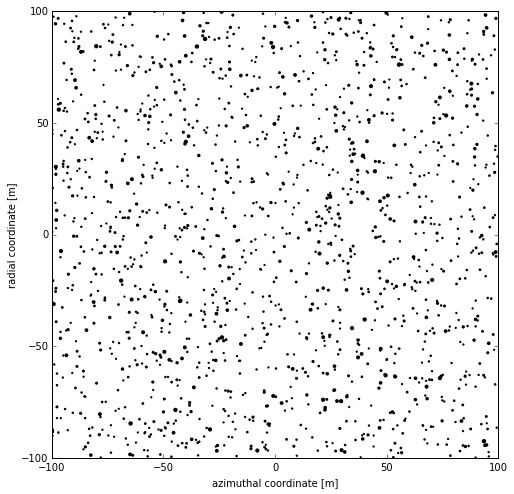

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def plotParticles(sim):
    x = np.zeros(sim.N)
    y = np.zeros(sim.N)
    r = np.zeros(sim.N)
    for i, p in enumerate(sim.particles):
        x[i], y[i], r[i] = p.x, p.y, p.r

    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(111,aspect='equal')
    ax.set_ylabel("radial coordinate [m]")
    ax.set_xlabel("azimuthal coordinate [m]")
    ax.set_ylim(-boxsize/2.,boxsize/2.)
    ax.set_xlim(-boxsize/2.,boxsize/2.)

    r_in_points = np.diff(ax.transData.transform(zip([0]*len(r), 2.*r))) 


    plt.scatter(y, x, marker='o', c='black', s=r_in_points, edgecolors='none');
plotParticles(sim)

In [7]:
sim.integrate(2.*np.pi/OMEGA)

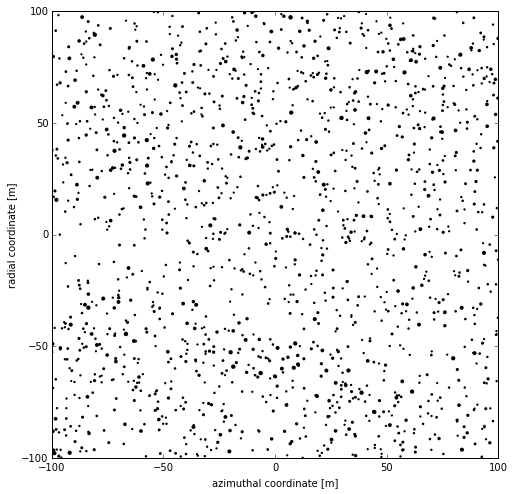

In [8]:
plotParticles(sim)